In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from pandas.tseries.frequencies import to_offset

import matplotlib
import matplotlib.pyplot as plt

from astropy.time import Time

matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120

In [2]:
gemini_data = '/scratch/cwalter/2022_03_16.txt'

gemini = pd.read_csv(gemini_data, parse_dates=[['Date','Time']], index_col='Date_Time', delim_whitespace=True)
gemini_5 = gemini.resample('5min').mean()
#gemini
#gemini_5

(0.3, 1.1)

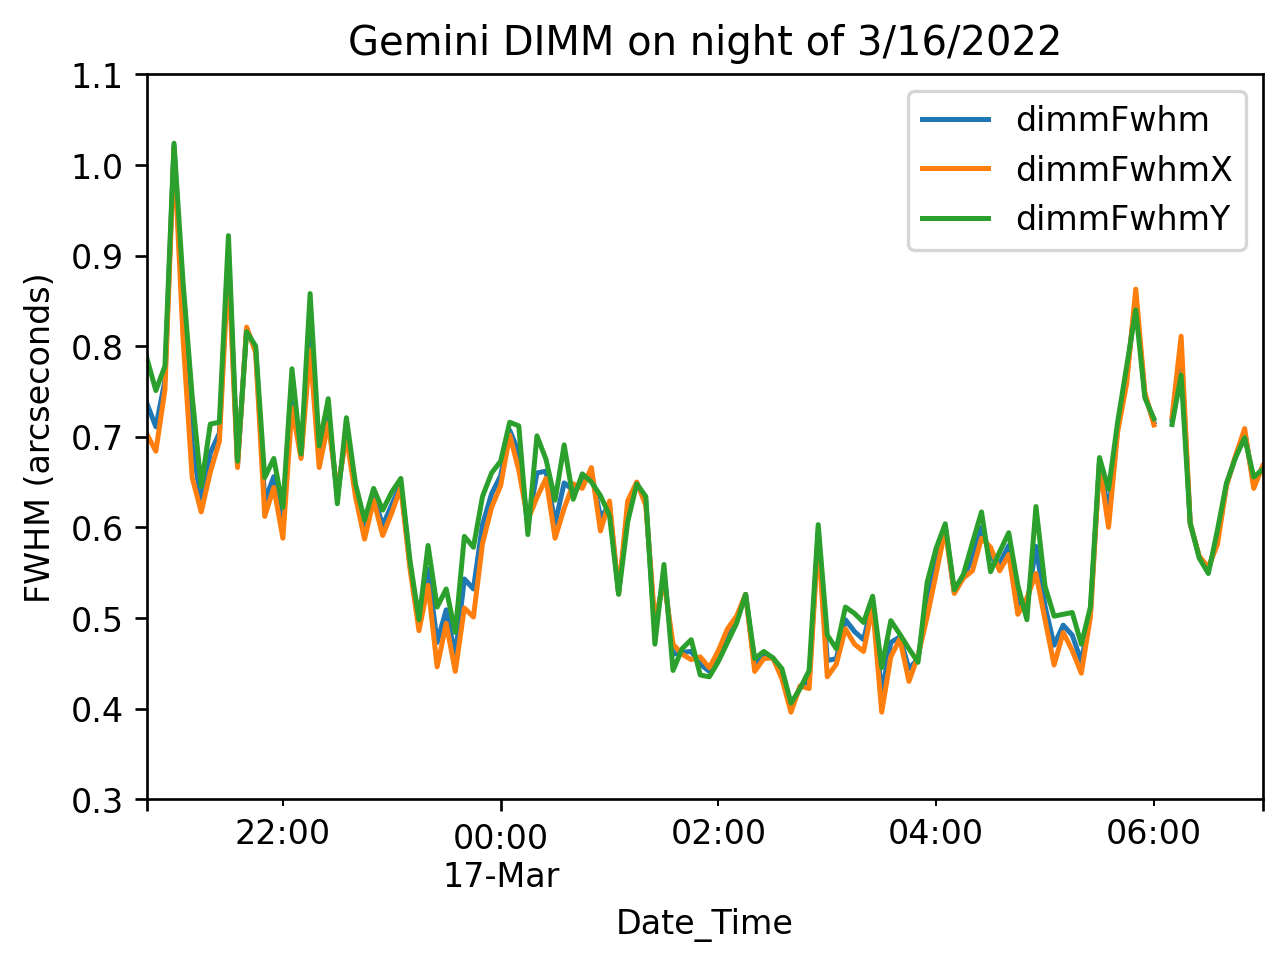

In [3]:
#Total is averaged seeing, X is left star, Y is right.

gemini_5.plot()

plt.title(r'Gemini DIMM on night of 3/16/2022')
plt.ylabel(r'FWHM (arcseconds)');

plt.ylim(0.3, 1.1)

In [4]:
from lsst_efd_client import EfdClient
efd_client = EfdClient('summit_efd')

In [5]:
#These times from manual chronograph query.
time_start = Time('2022-03-17T00:52:26.529Z')
time_end = Time('2022-03-17T09:53:28.733Z')

dimm = await efd_client.select_time_series(
        'lsst.sal.DIMM.logevent_dimmMeasurement', 
        fields=['fwhm', 'fhwmx', 'fwhmy'], 
        start=time_start, 
        end=time_end)

dimm.index = dimm.index.tz_convert('America/Santiago')
dimm_5 = dimm.resample('5min').mean()
#dimm

(0.3, 1.1)

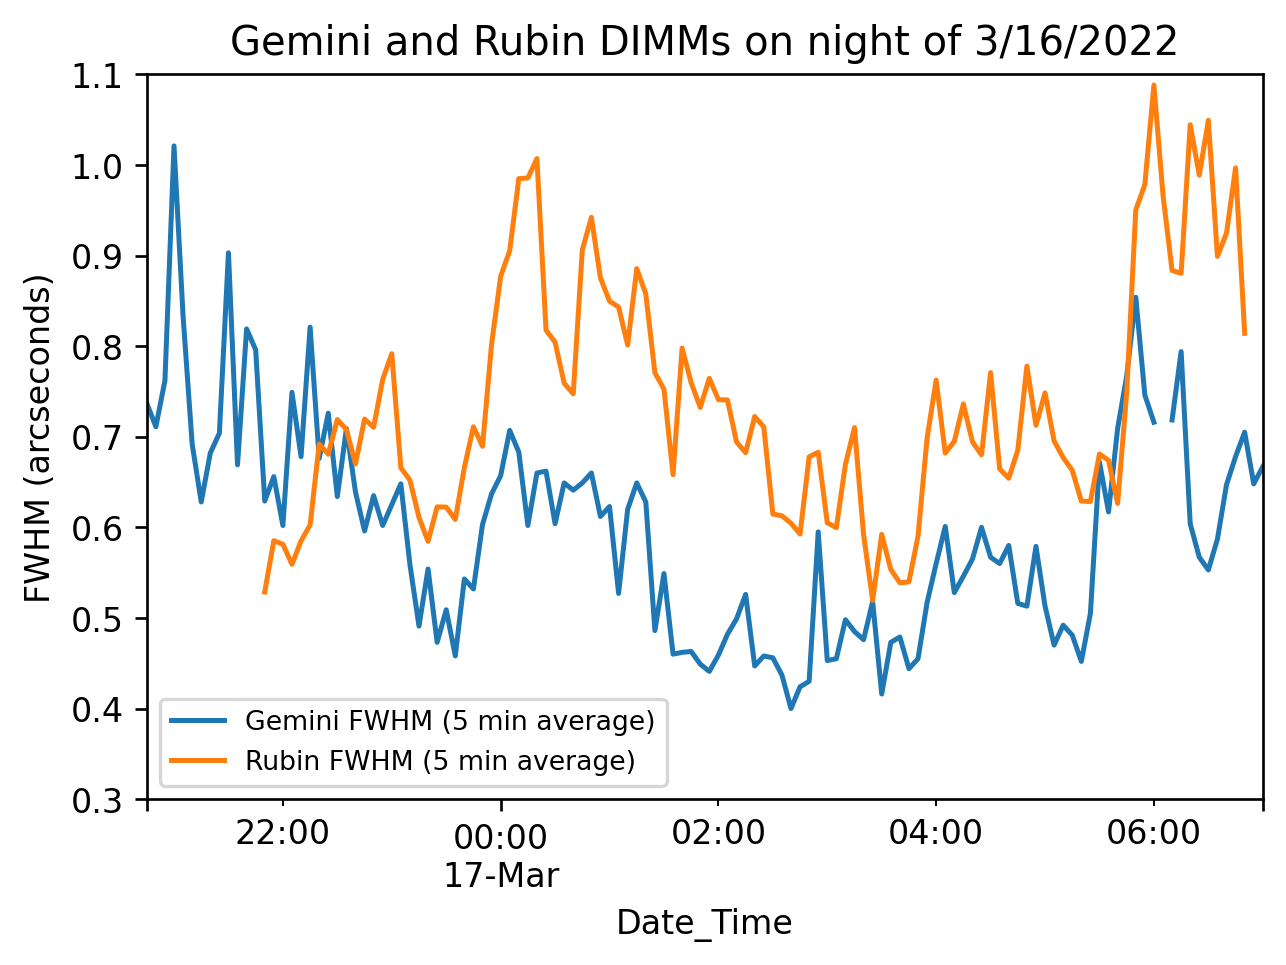

In [6]:
gemini_5.dimmFwhm.plot(label = 'Gemini FWHM (5 min average)')
dimm_5.fwhm.plot(label = 'Rubin FWHM (5 min average)')

plt.title(r'Gemini and Rubin DIMMs on night of 3/16/2022')
plt.ylabel(r'FWHM (arcseconds)');
plt.legend(fontsize=8)

plt.ylim(0.3, 1.1)

In [7]:
auxtel_data = '/scratch/cwalter/20220316_E6A_LATISS_DeliveredIQ.csv'
auxtel = pd.read_csv(auxtel_data, parse_dates=['UTDate'], index_col='UTDate')

auxtel.index = auxtel.index.tz_localize('utc')
auxtel.index = auxtel.index.tz_convert('America/Santiago')
auxtel_5 = auxtel.resample('5min').mean()

In [8]:
auxtel_5

,DIMM,measCorrFWHM
UTDate,,
2022-03-17 00:25:00-03:00,0.772500,1.044000
2022-03-17 00:30:00-03:00,0.807750,1.041750
2022-03-17 00:35:00-03:00,0.769250,0.887750
2022-03-17 00:40:00-03:00,0.732625,0.966875
2022-03-17 00:45:00-03:00,0.870000,1.065250
...,...,...
2022-03-17 06:00:00-03:00,1.078125,1.226000
2022-03-17 06:05:00-03:00,1.014250,1.222250
2022-03-17 06:10:00-03:00,0.845000,1.156667


(0.3, 1.4)

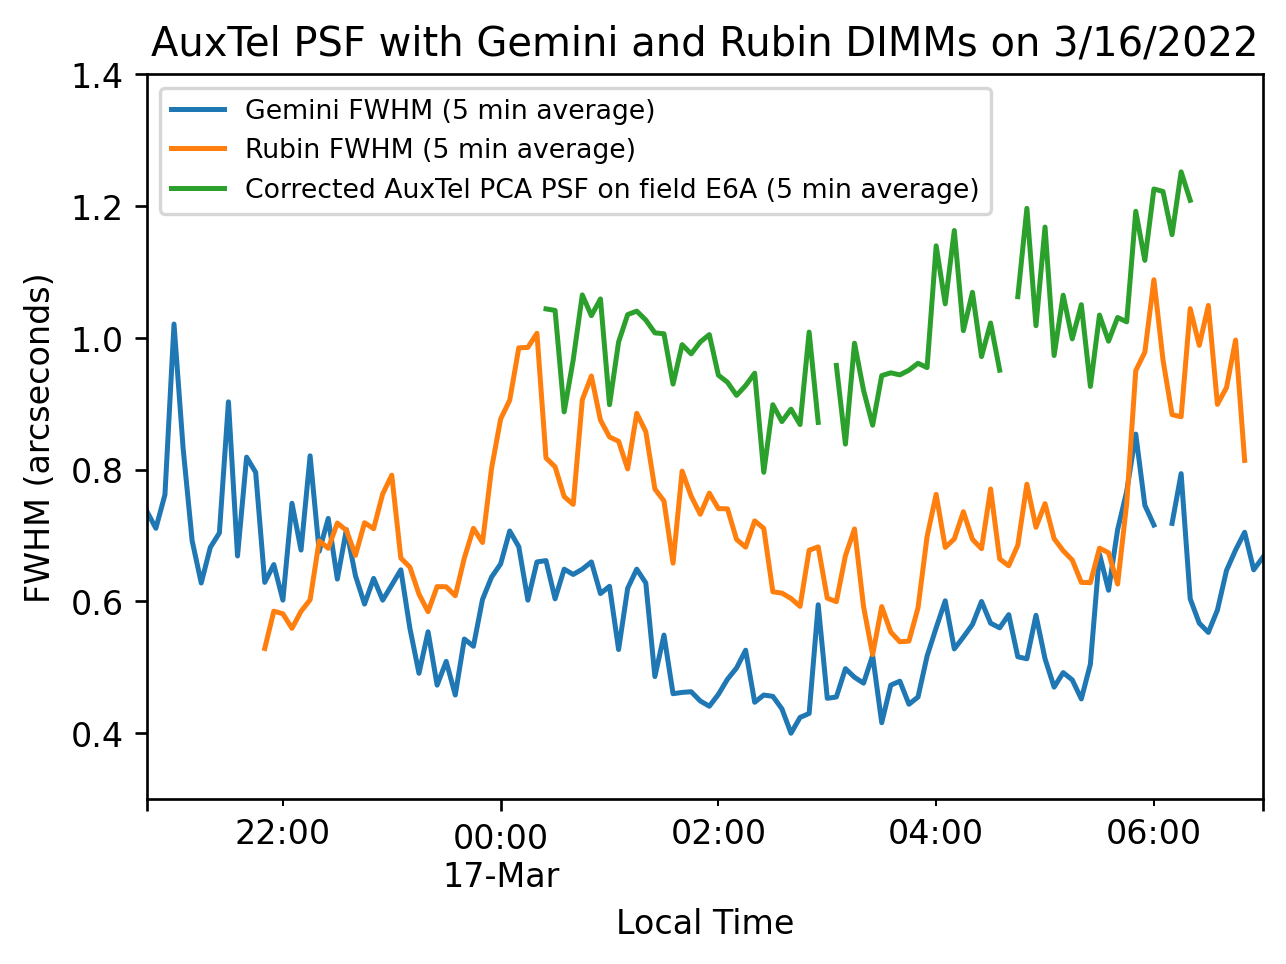

In [9]:
gemini_5.dimmFwhm.plot(label = 'Gemini FWHM (5 min average)')
dimm_5.fwhm.plot(label = 'Rubin FWHM (5 min average)')
auxtel_5.measCorrFWHM.plot(label = 'Corrected AuxTel PCA PSF on field E6A (5 min average)')

plt.title(r'AuxTel PSF with Gemini and Rubin DIMMs on 3/16/2022')
plt.ylabel(r'FWHM (arcseconds)')
plt.xlabel(r'Local Time');
plt.legend(fontsize=8)

plt.ylim(0.3, 1.4)


(0.5, 1.4)

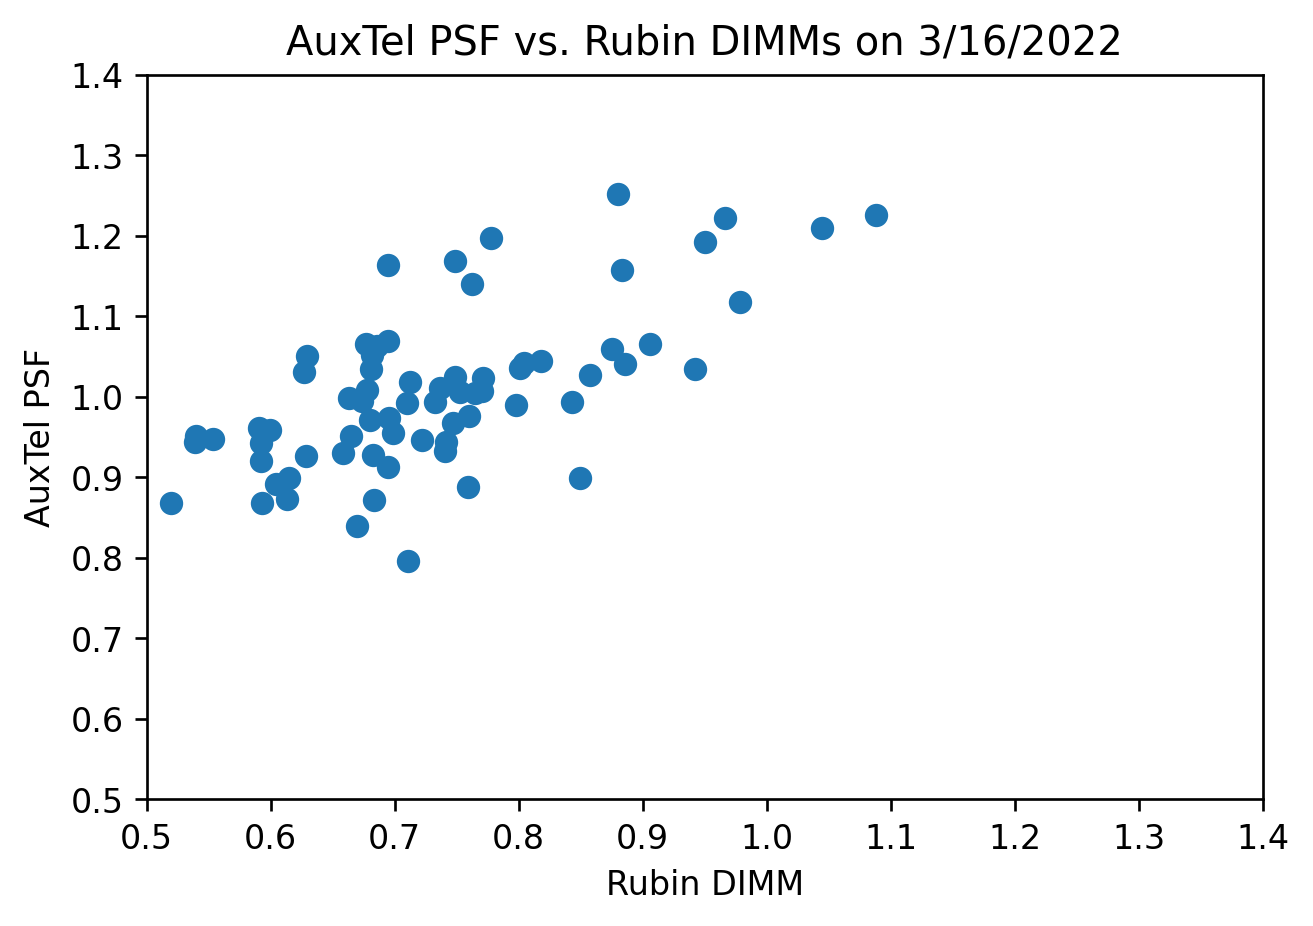

In [10]:
plt.scatter(dimm_5[31:-6].fwhm.values, auxtel_5.measCorrFWHM.values)

plt.title(r'AuxTel PSF vs. Rubin DIMMs on 3/16/2022')
plt.xlabel(r'Rubin DIMM')
plt.ylabel(r'AuxTel PSF')

plt.xlim(0.5, 1.4)
plt.ylim(0.5, 1.4)

In [11]:
#Get Weather
wind_speed = await efd_client.select_time_series(
        'lsst.sal.WeatherStation.windSpeed', 
        fields=['value'], 
        start=time_start, 
        end=time_end)

wind_direction = await efd_client.select_time_series(
        'lsst.sal.WeatherStation.windDirection', 
        fields=['value'], 
        start=time_start, 
        end=time_end)

wind_speed.index = wind_speed.index.tz_convert('America/Santiago')
wind_direction.index = wind_direction.index.tz_convert('America/Santiago')

wind_speed_5 = wind_speed.resample('5min').mean()
wind_direction_5 = wind_direction.resample('5min').mean()

Text(0.5, 1.0, 'Wind Speed on 3/16/2022')

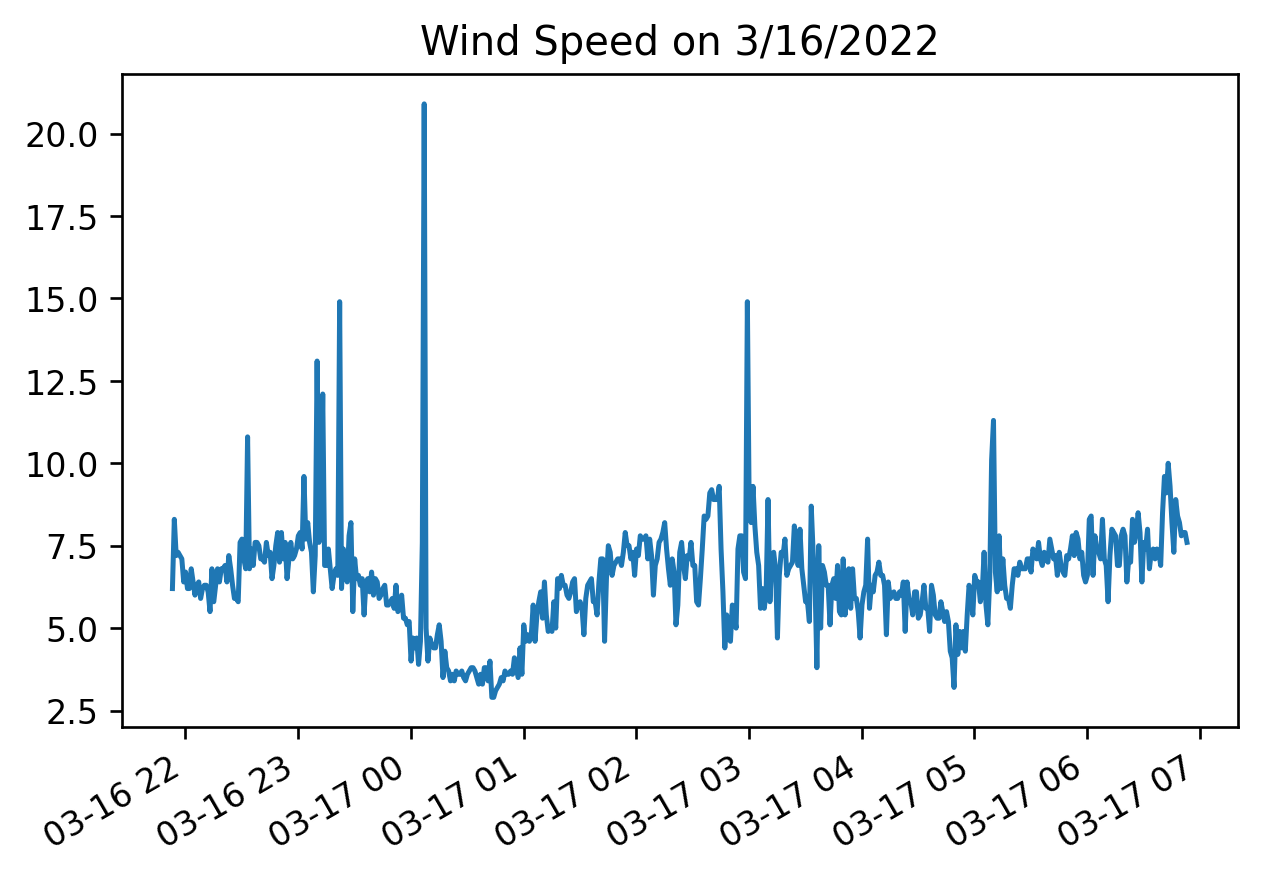

In [12]:
wind_speed.value.plot()
plt.title(r'Wind Speed on 3/16/2022')
#plt.ylim(2.0, 10.0)

Text(0.5, 1.0, 'Wind Direction on 3/16/2022')

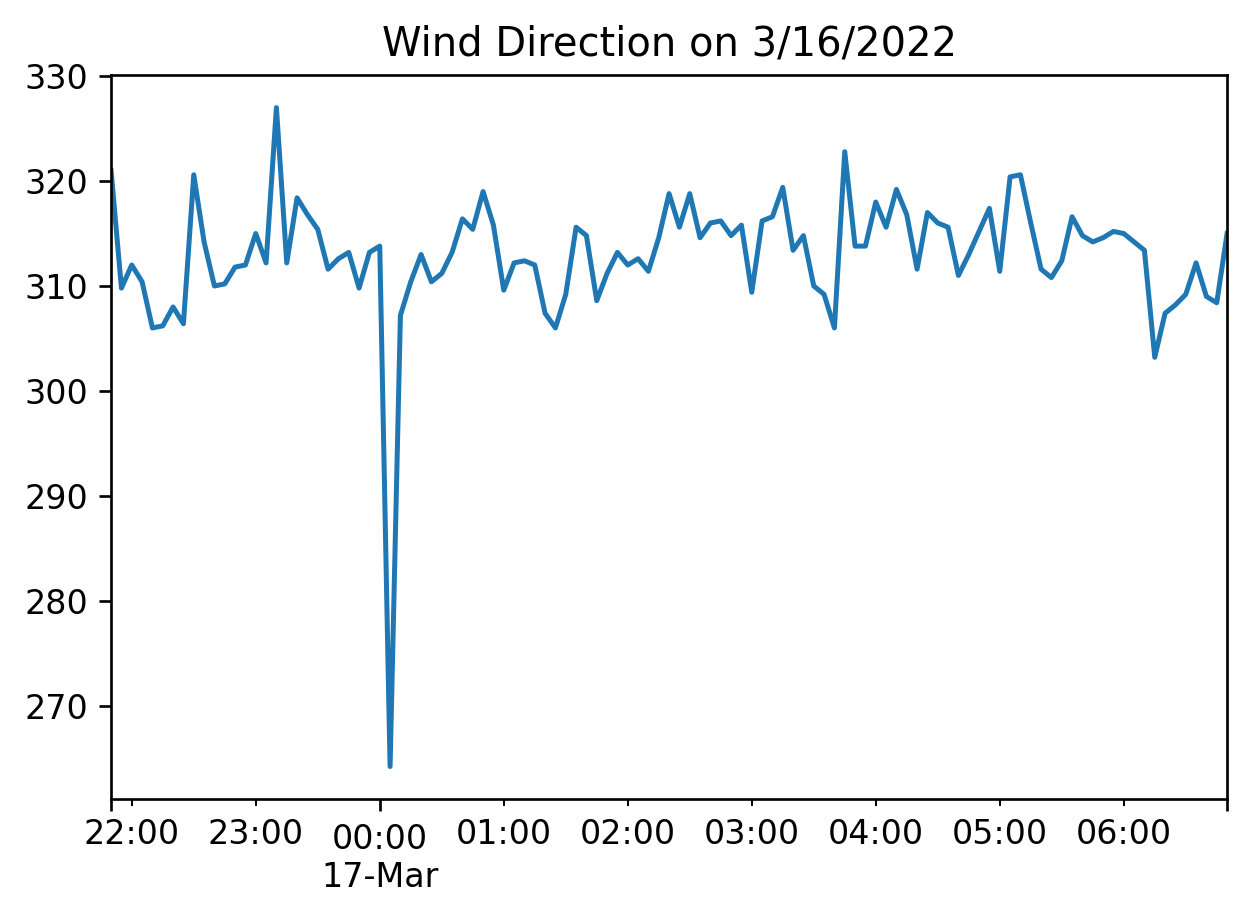

In [13]:
wind_direction_5.value.plot()
plt.title(r'Wind Direction on 3/16/2022')